# Choosing Your Own Visualization Style

- This notebook is designed to help select your own personal visualization aesthetic by using a combination of Matplotlib syles and Seaborn contexts.


In [1]:
## Our standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
os.makedirs('images/', exist_ok=True)

In [2]:
## Load in the student performance - math dataset & display the head and info
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"

df = pd.read_excel(url,sheet_name='student-mat')

## making a feature with longer names for testing savefig
df['LongFjob'] = df['Fjob'] +'__' + df['Fjob'] + '__' + df['Fjob']

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,LongFjob
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,teacher__teacher__teacher
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,other__other__other
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,other__other__other


### Check installed plotting packages

In [3]:
import matplotlib
matplotlib.__version__

'3.4.3'

In [4]:
import seaborn as sns
sns.__version__

'0.11.2'

### Function for quick `test_plot` 

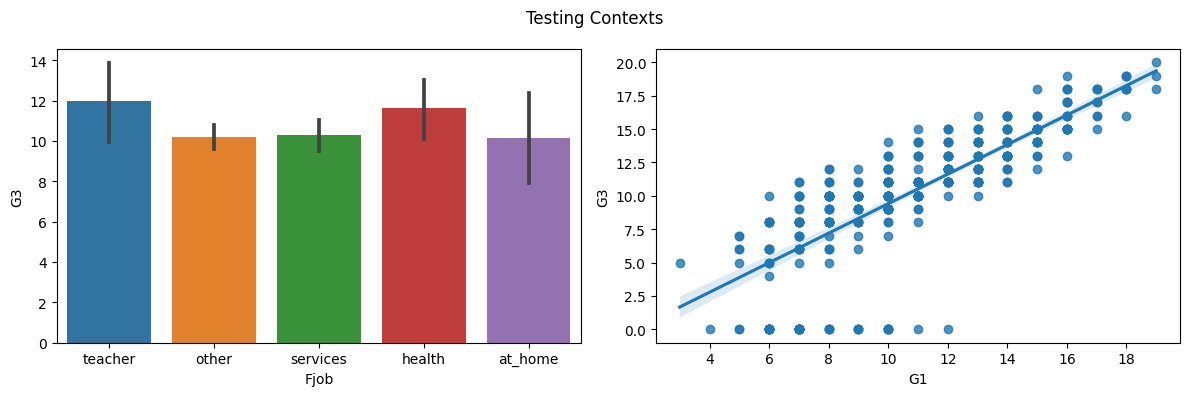

In [5]:
## TESTING VIZ PARAMS [temp]

def test_plot(title='Testing Contexts',x1='Fjob',rotate=False):
    fig,axes = plt.subplots(ncols=2,figsize=(12,4))
    sns.barplot(data=df,x=x1,y='G3',ax=axes[0])
    sns.regplot(data=df,x='G1',y='G3',ax=axes[1])
    fig.suptitle(title)
    
    if rotate:
        axes[0].set_xticklabels(axes[0].get_xticklabels(),
                            rotation=45, ha='right')
    else:
        fig.tight_layout()        
    
    return fig,axes

test_plot();

>- This is the figure we will be using to compare visualization aesthetics. This is what the figure looks like without any visualization customization.

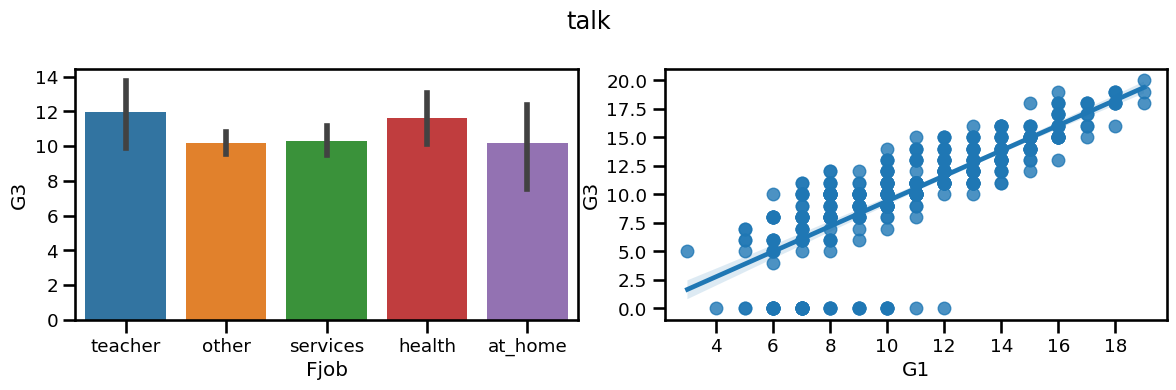

In [6]:
### temp setting context with sns.plotting_context
context = 'talk'
fontscale = .8

with sns.plotting_context(context=context,font_scale=fontscale):
    f,ax= test_plot(context)


## Testing Options for `sns.set_context`
Various seaborn contexts + font scales

- To test different combinations of seaborn contexts + font_scale options, create a list of tuples called `text_contexts` where each tuple contains:
    1. a seaborn context  (e.g. talk,notebook,poster, paper)
    2. a value for font_scale (e.g. 0.8,1.0,1.1)
    
    
```python
## Example list of tuples with (context, fontscale)
test_contexts = [('talk',.8), ('notebook',1.1), ('paper',1.1)]
```

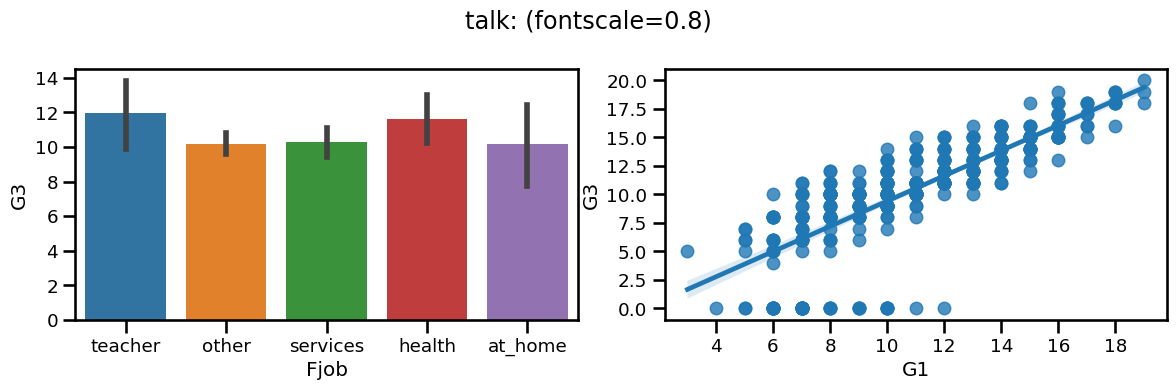

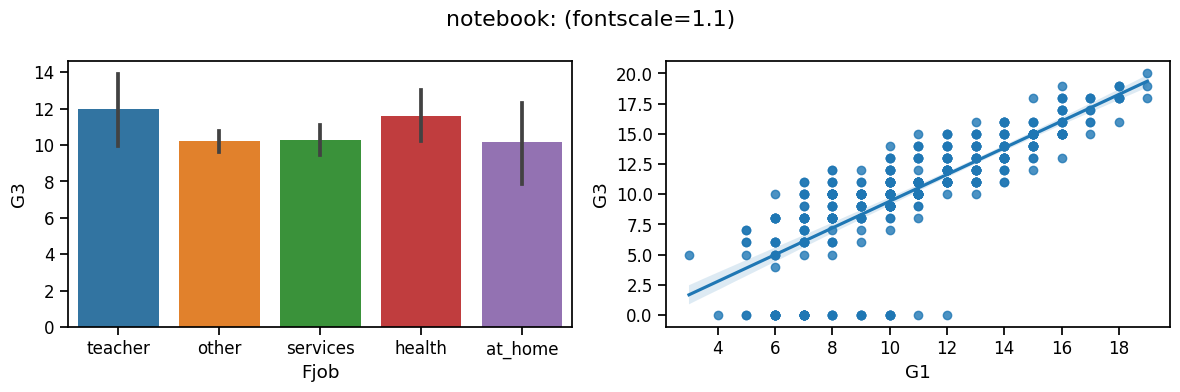

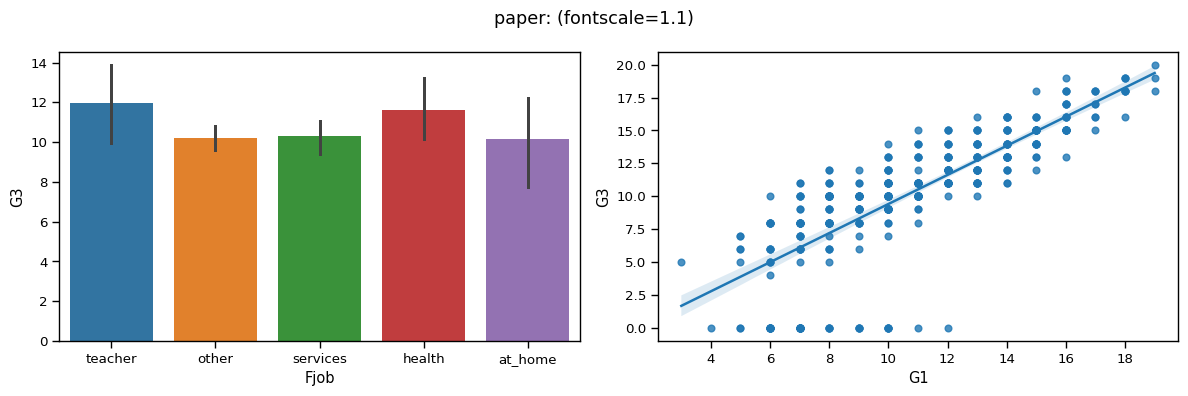

In [7]:
# YOUR OPTIONS HERE
## context, fontscale
test_contexts = [('talk',.8), ('notebook',1.1), ('paper',1.1)]



for (context,font_scale) in test_contexts:
    
    with sns.plotting_context(context=context,
                              font_scale=font_scale):
        f,ax= test_plot(title=f"{context}: (fontscale={font_scale})")

## Testing Matplotlib Styles (for `plt.style.use`)

- Let's preview all of the available named styles in Matplotlib and then decide which ones we want to try combining into 1 final style.

In [8]:
# all styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

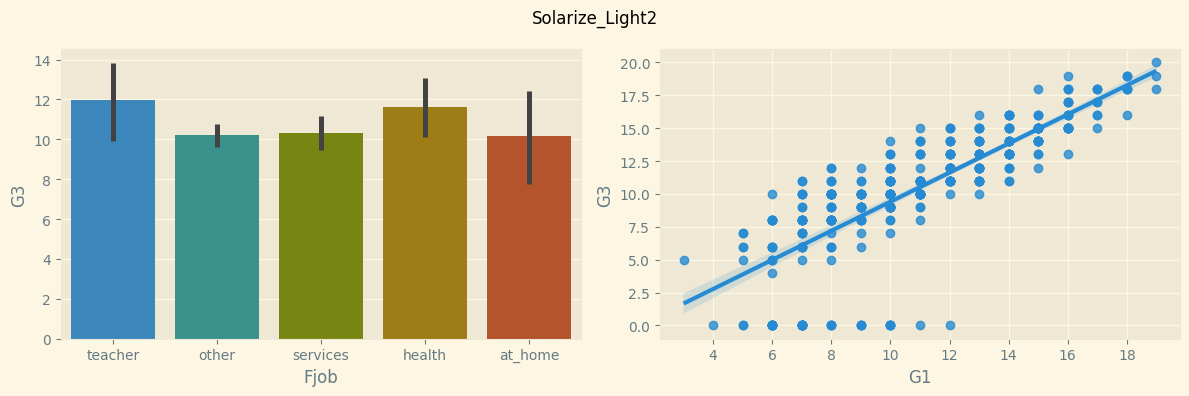

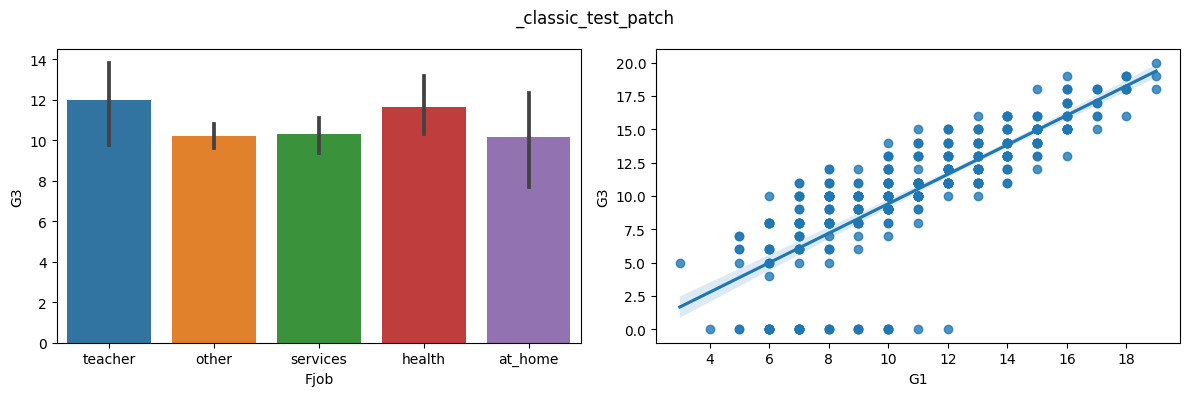

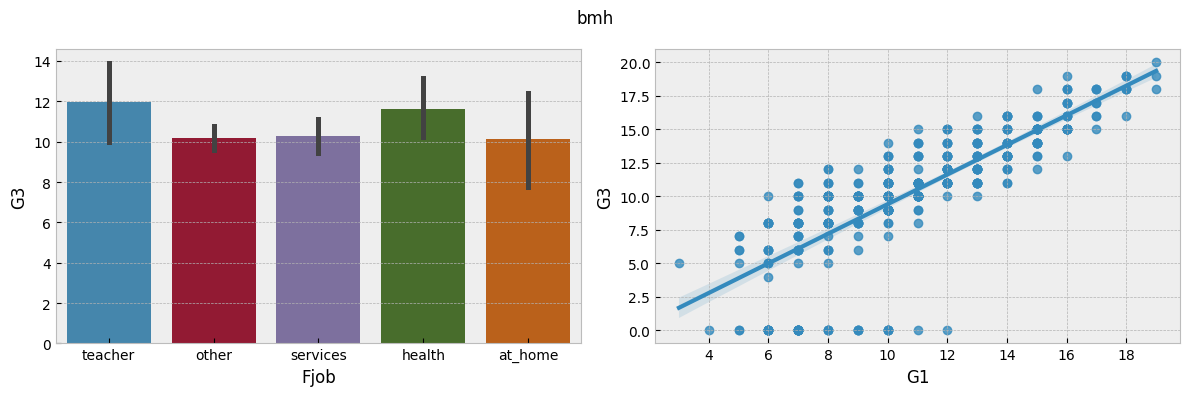

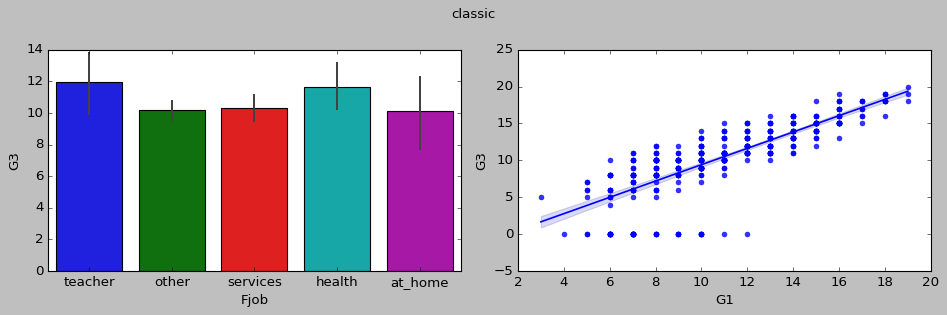

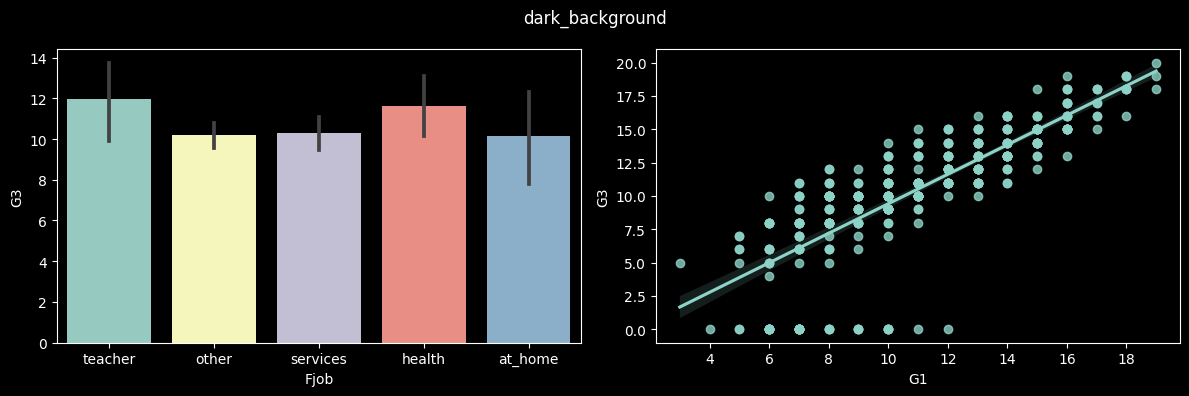

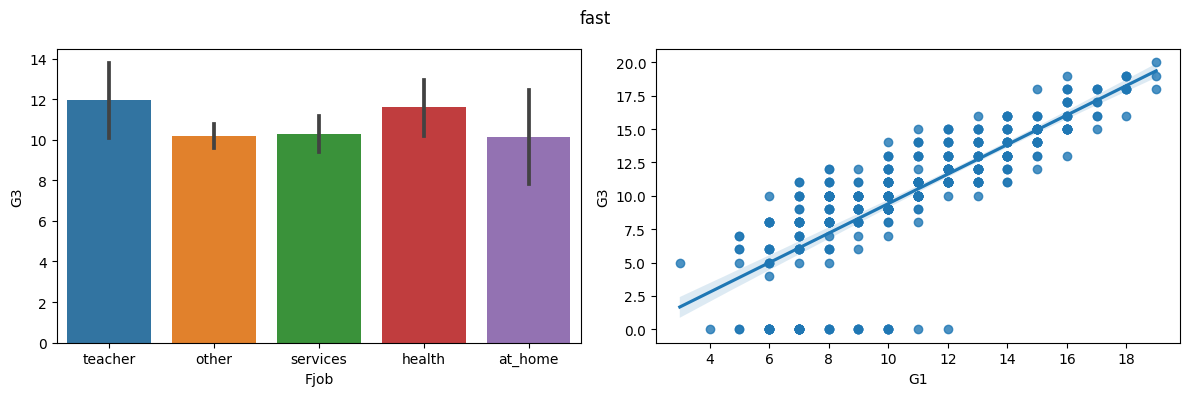

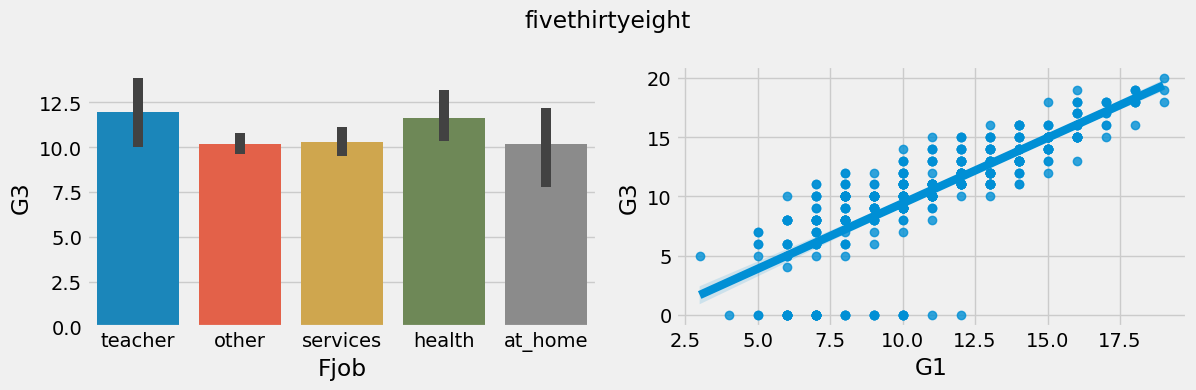

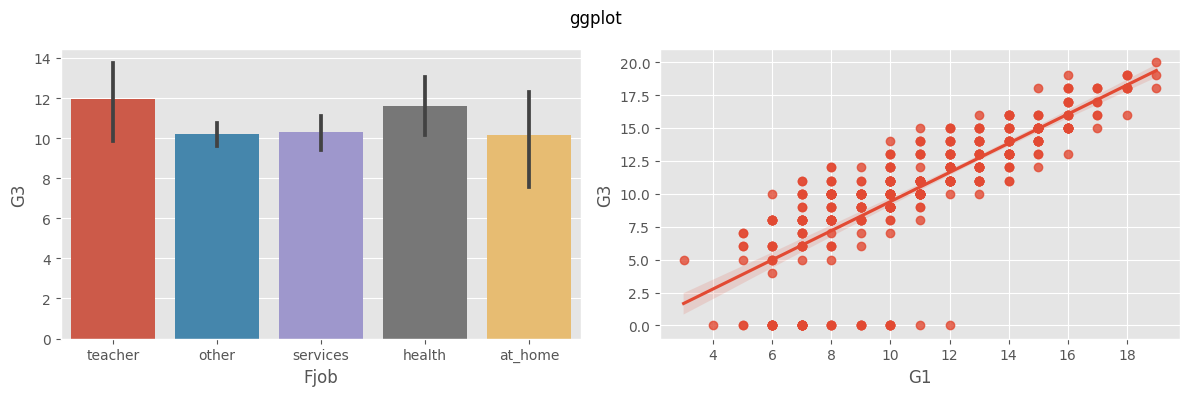

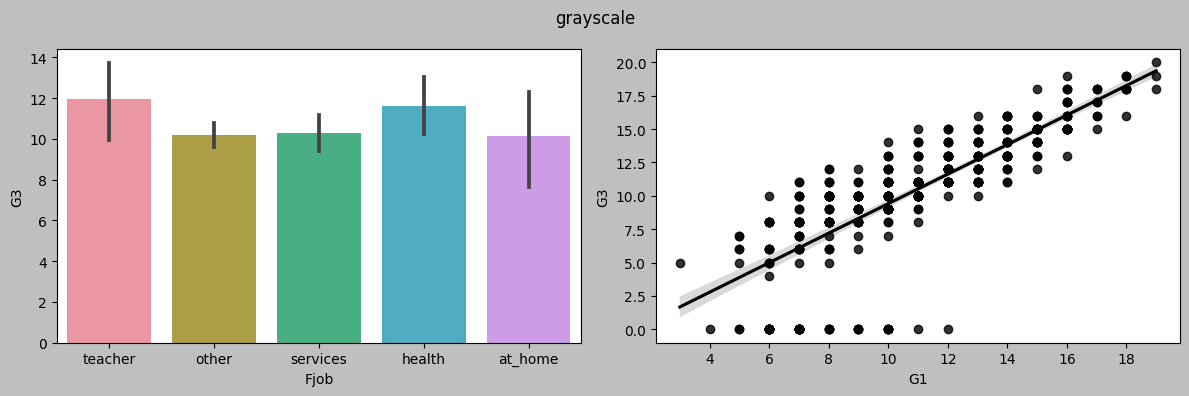

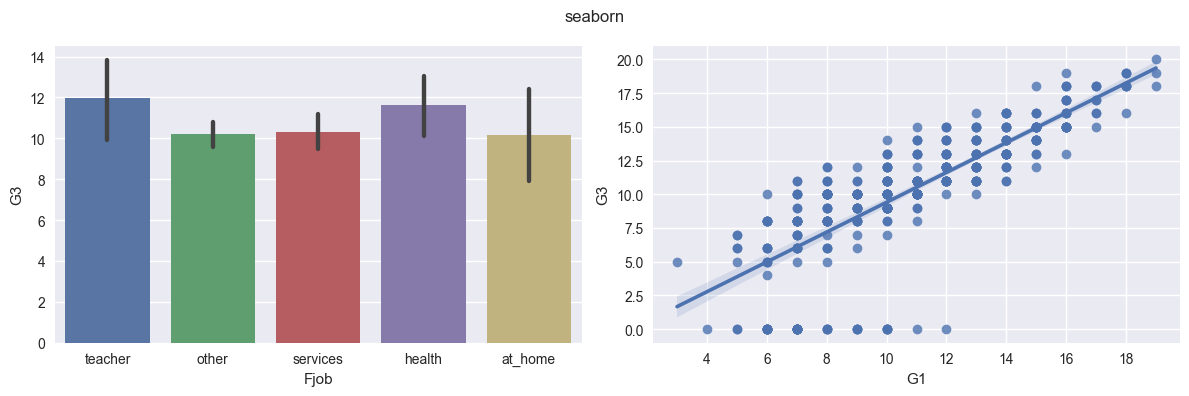

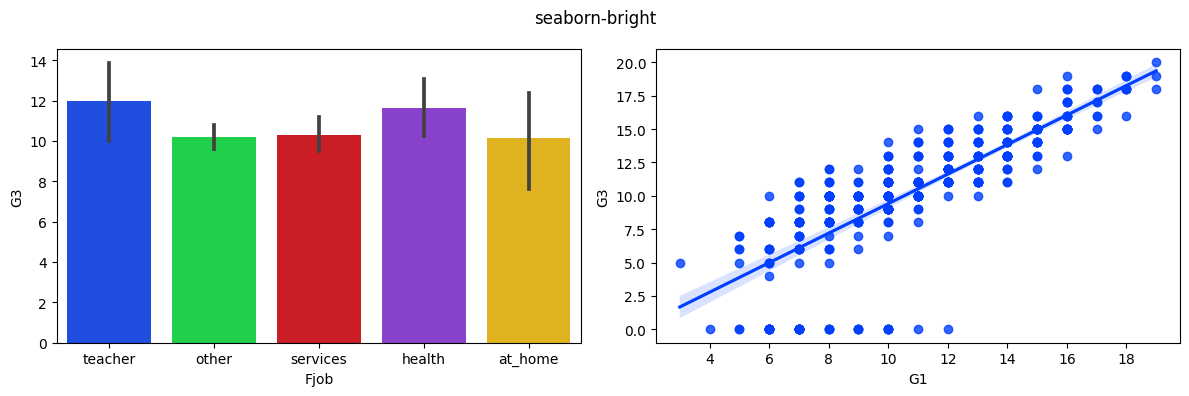

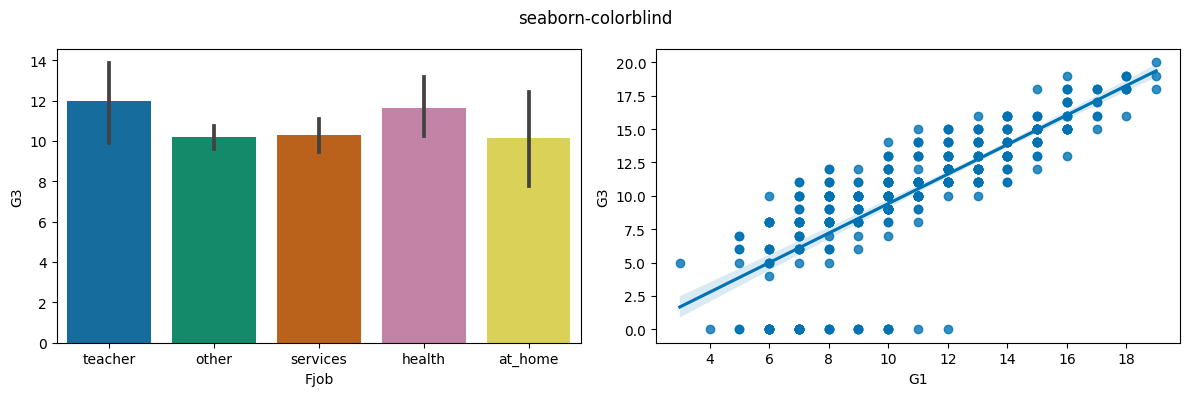

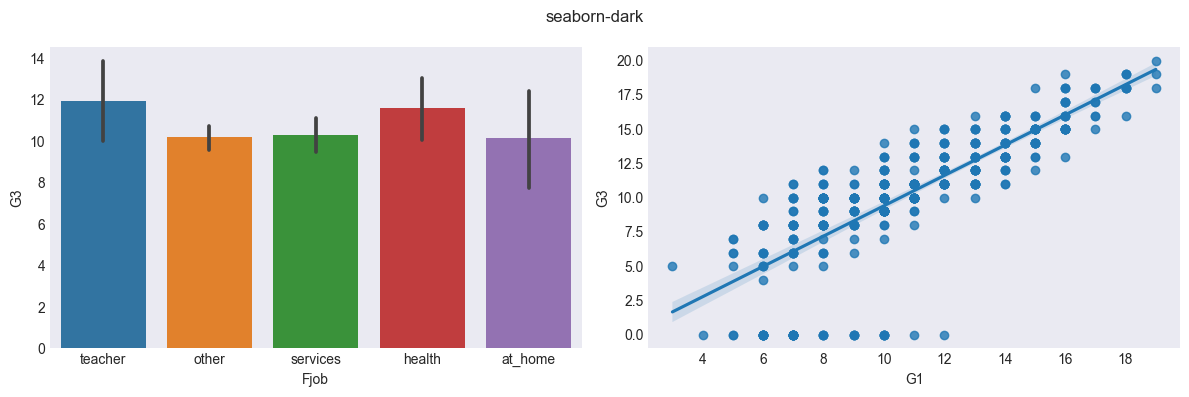

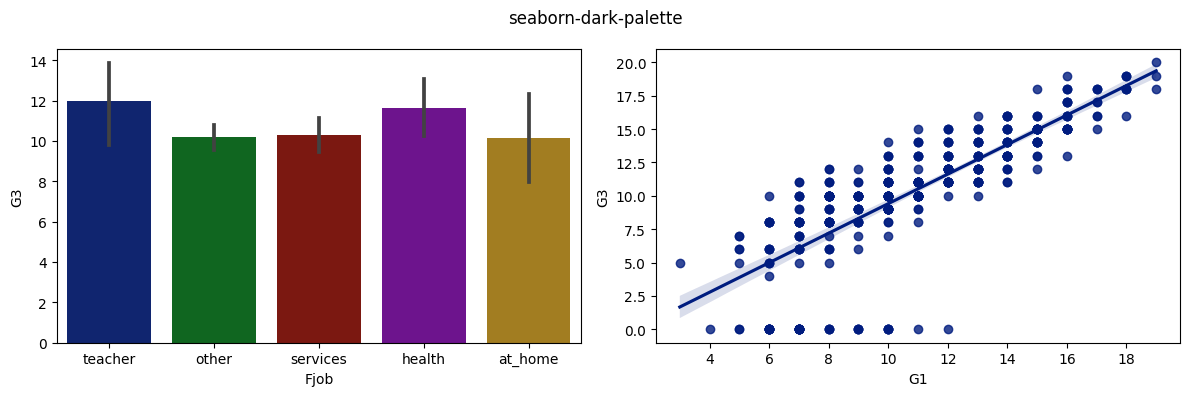

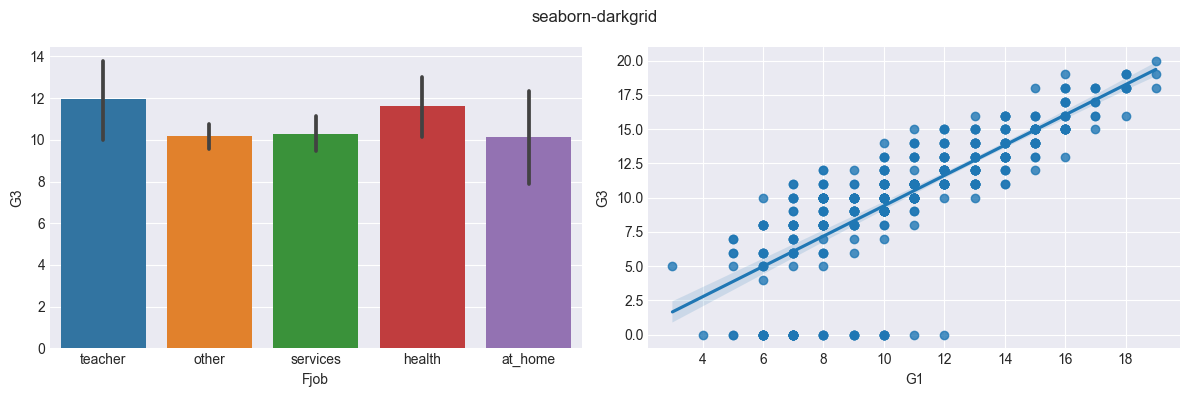

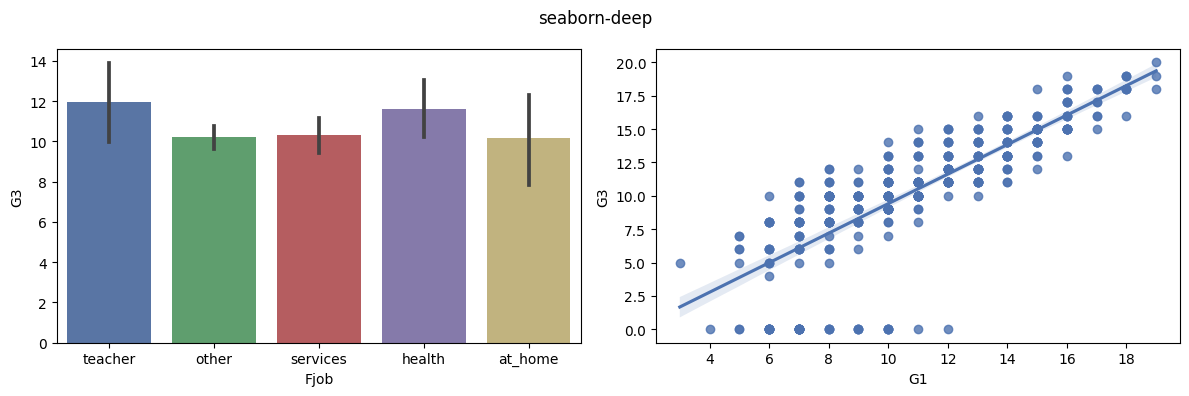

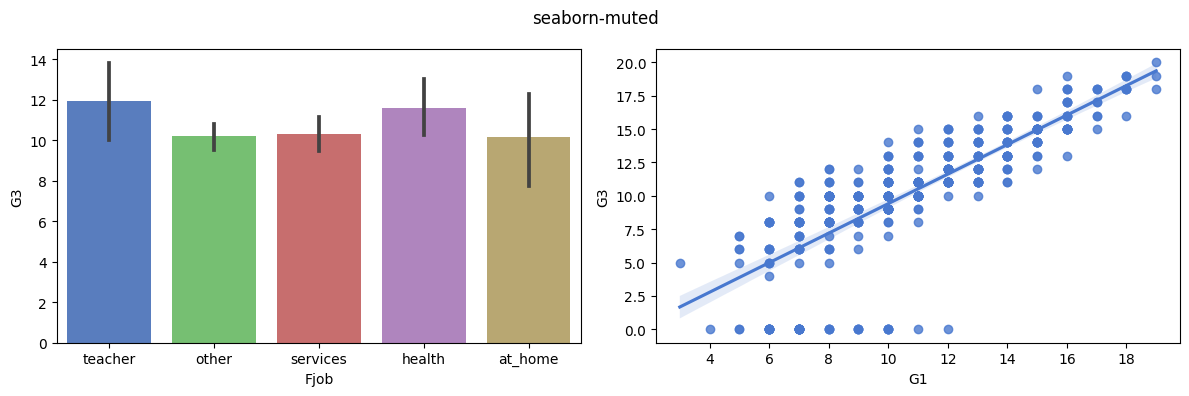

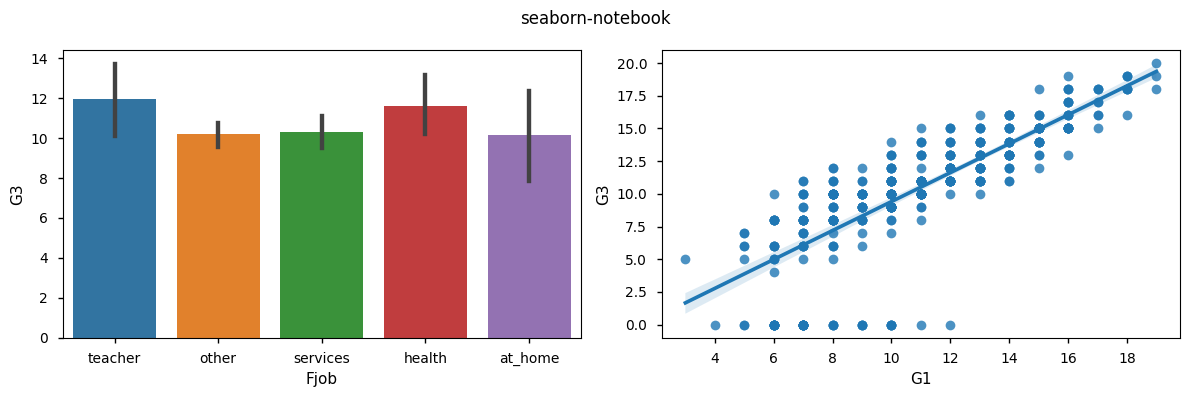

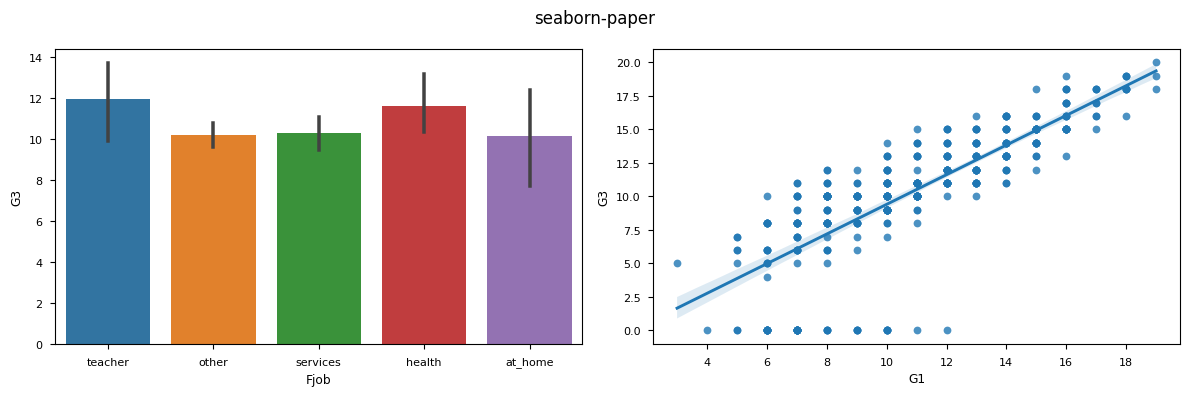

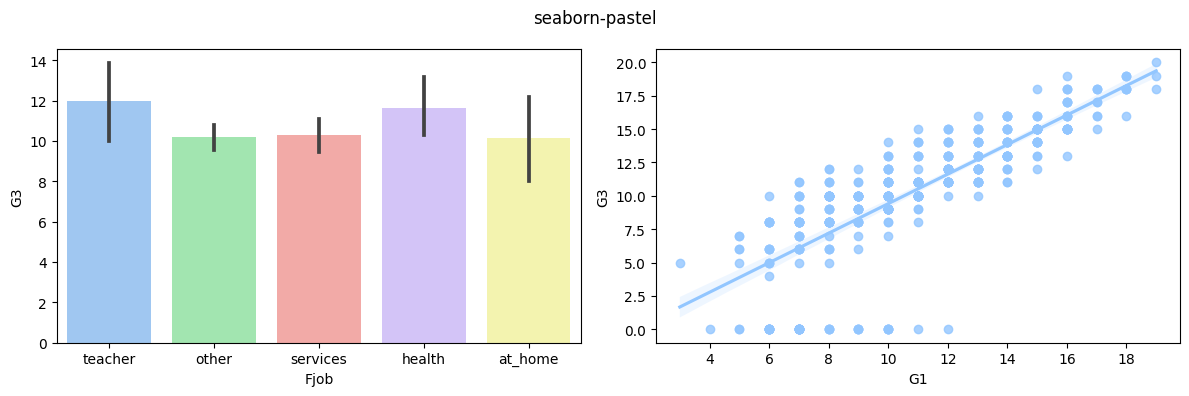

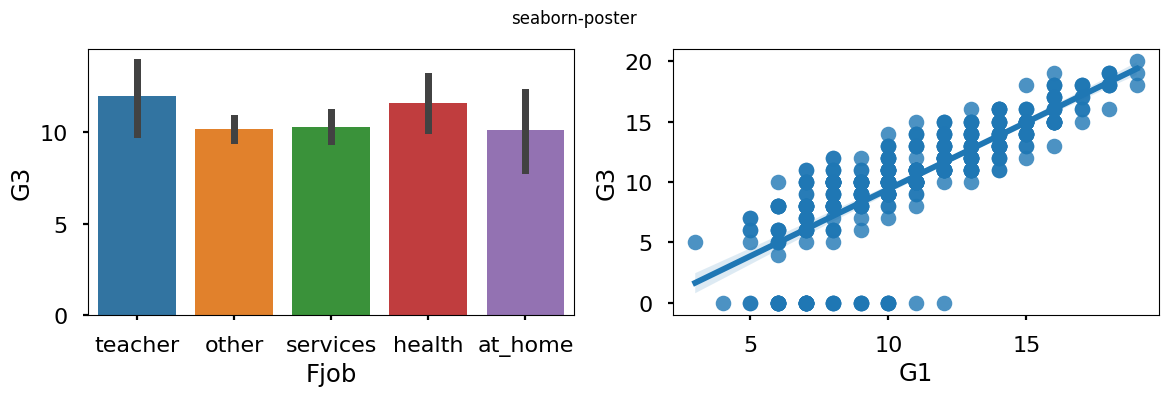

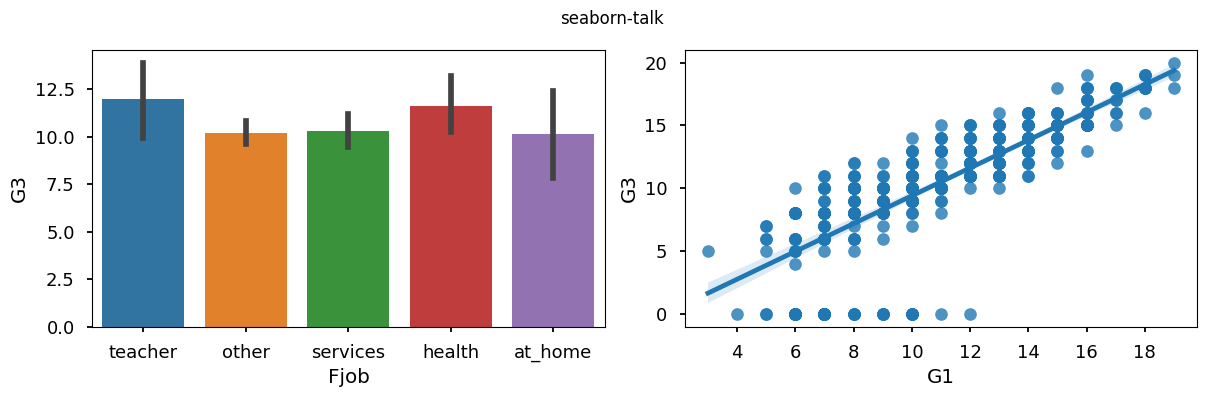

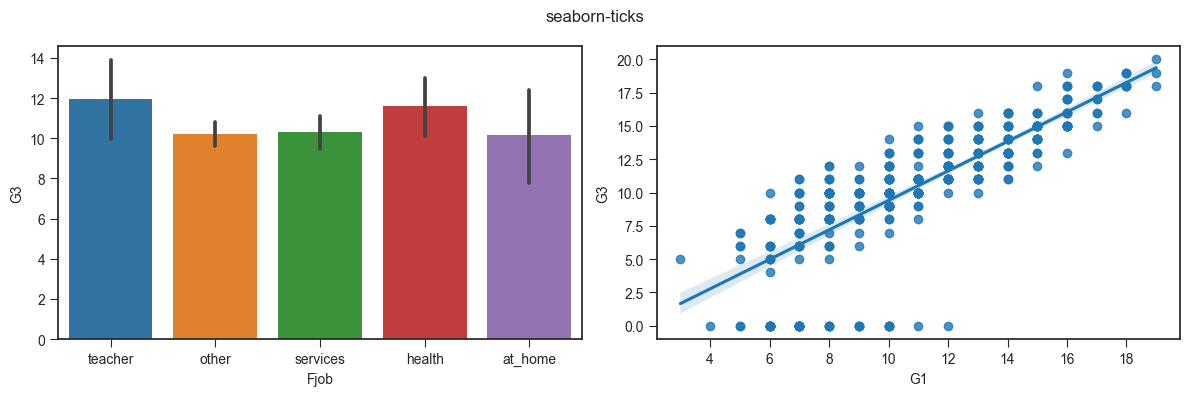

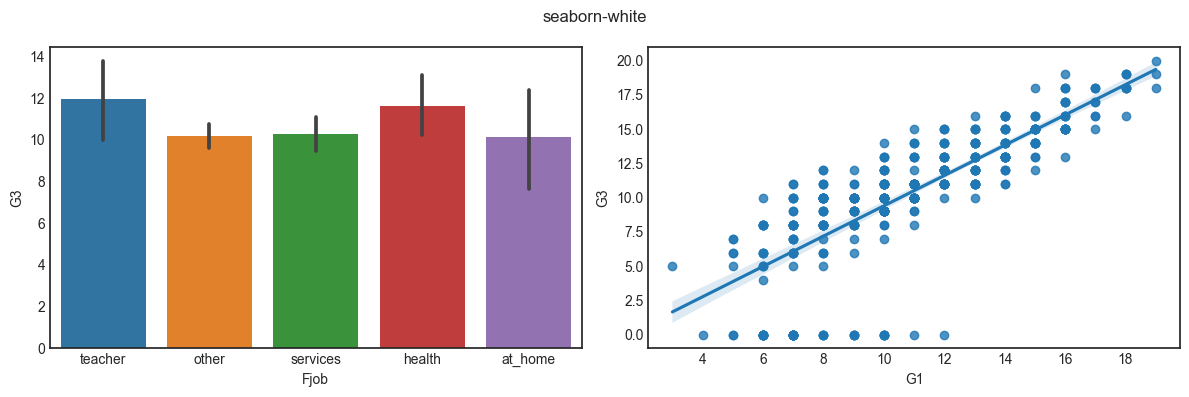

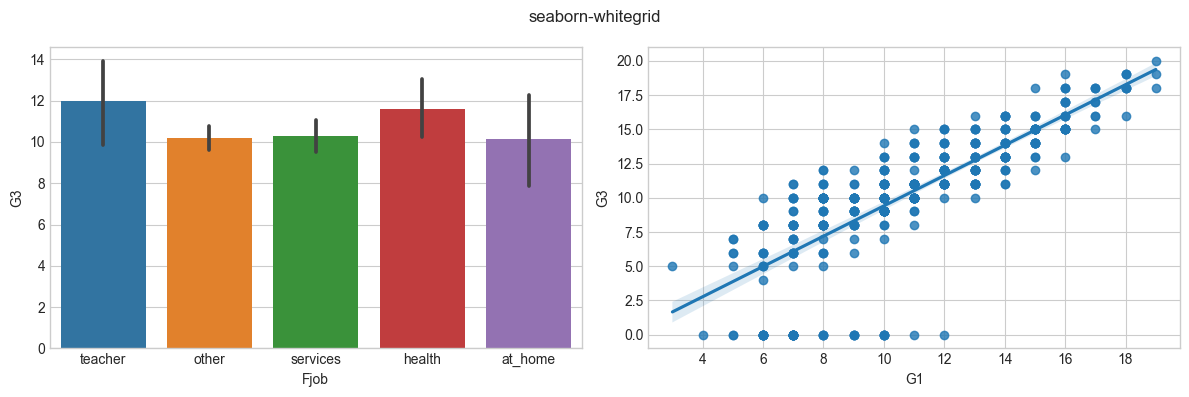

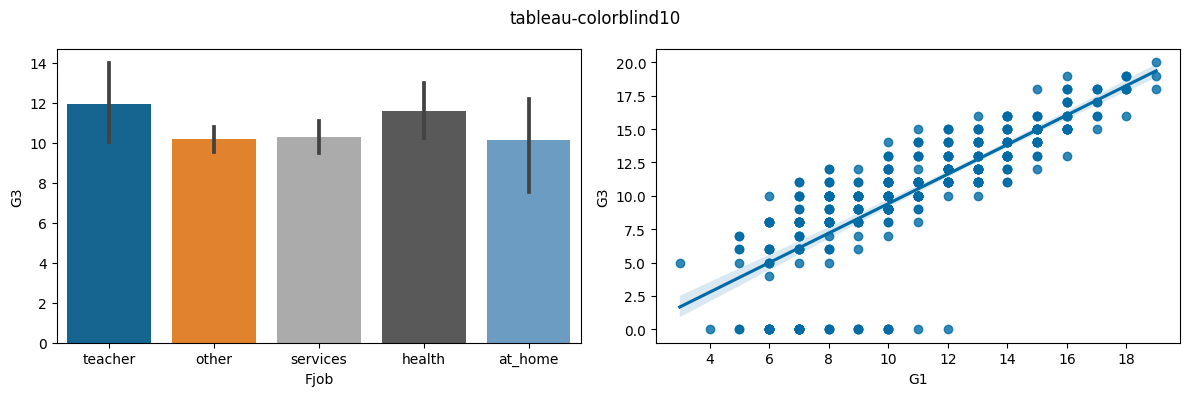

In [9]:
## Loop to create plot using style temporarily 
for style in plt.style.available:
    with plt.style.context(style):
        f,ax= test_plot(title=style)
        plt.show()
        del f

### Testing Combinations of Styles 

- Based on the styles above, create a list called `test_combined` that contains a list of tuples with each tuple containing the names of multiple styles to combine. 
    - Note: the order does matter, so for any pair of styles, you should try both orders.
    
```python
# list of tuples with (style1, style2) (or more!)
test_combined = [('tableau-colorblind10','fivethirtyeight'),
                ('fivethirtyeight','tableau-colorblind10')]
```

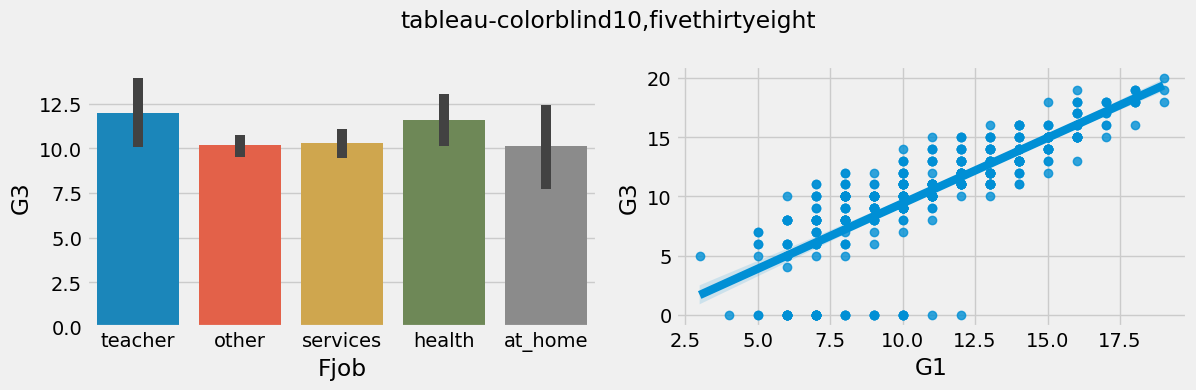

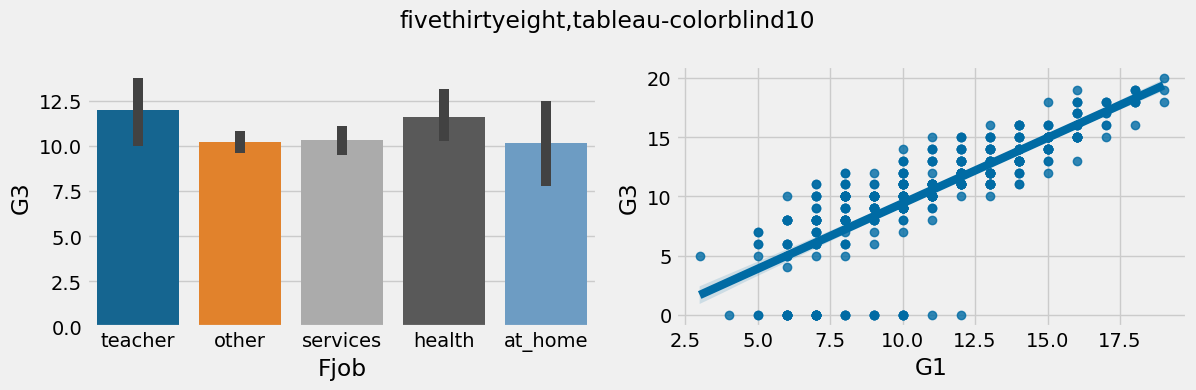

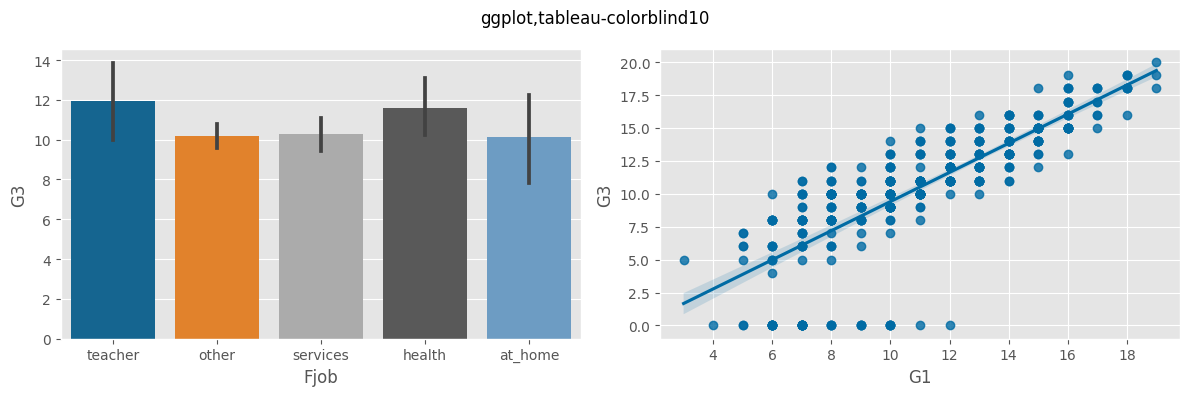

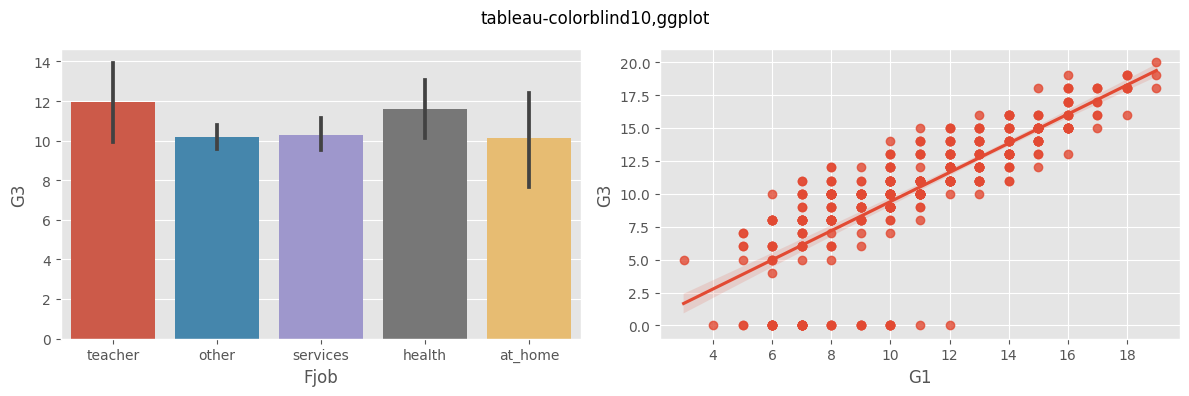

In [10]:
# YOUR OPTIONS HERE
# list of tuples with (style1, style2) (or more!)
test_combined = [('tableau-colorblind10','fivethirtyeight'),
                ('fivethirtyeight','tableau-colorblind10'),
                ('ggplot','tableau-colorblind10'),
                ('tableau-colorblind10','ggplot',)]



## Loop to test out every style combination
for style in test_combined:
    with plt.style.context(style):
        f,ax= test_plot(title=f"{style[0]},{style[1]}")
        plt.show()
        del f

# Selecting Final Fav Style & Re-test contexts

### Select Fav Style

- Based on the outputs above, select your final favorite matplotlib style (or tuple of styles) and save them as `fav_style`

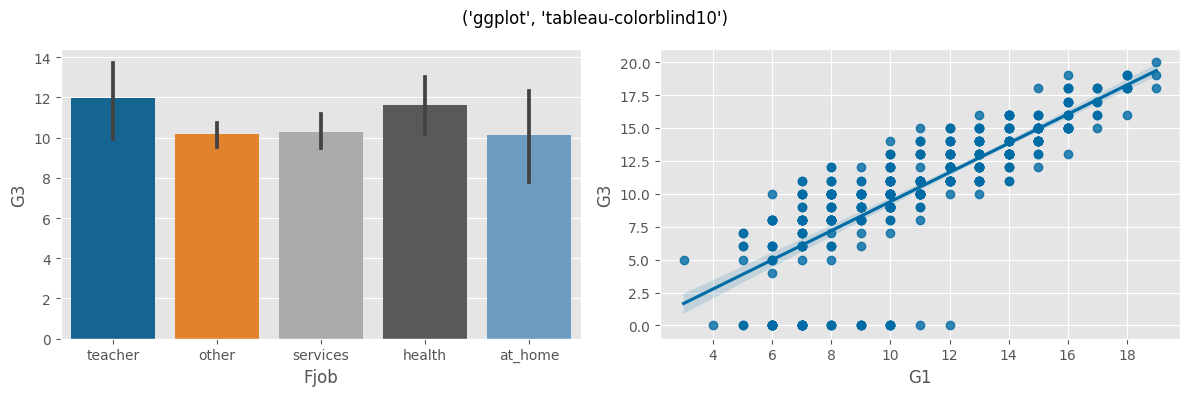

In [11]:
## YOUR FAV_STYLE HERE
fav_style = ('ggplot','tableau-colorblind10')


## Previewing fav_style temporarily
with plt.style.context(fav_style):
    test_plot(title=str(fav_style));

### Test Options for `sns.set_context` with Fav Style

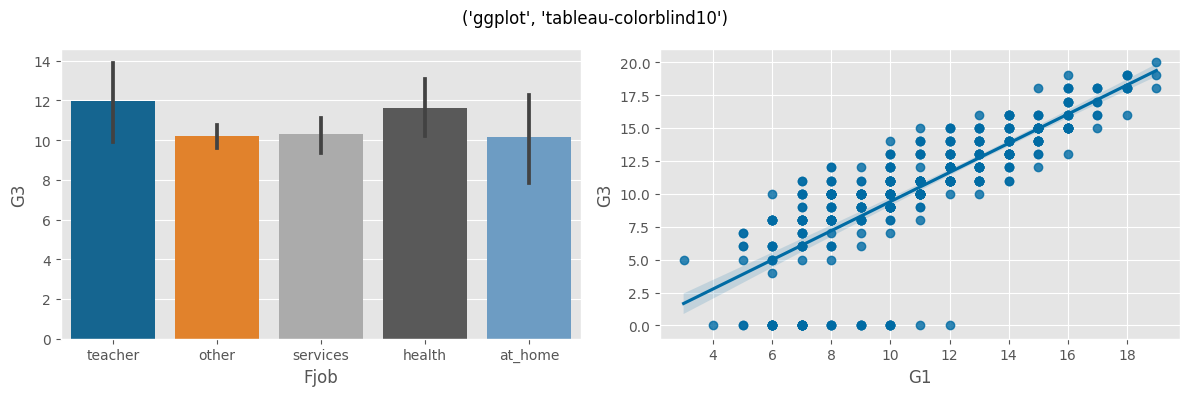

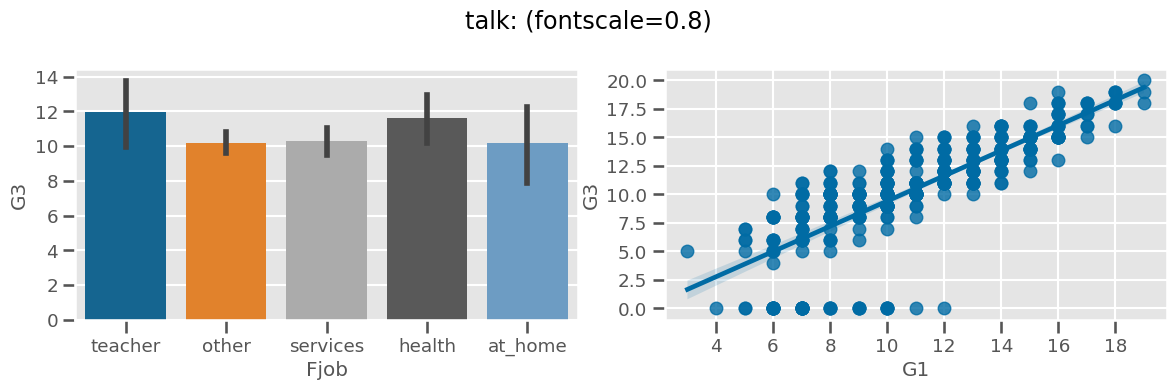

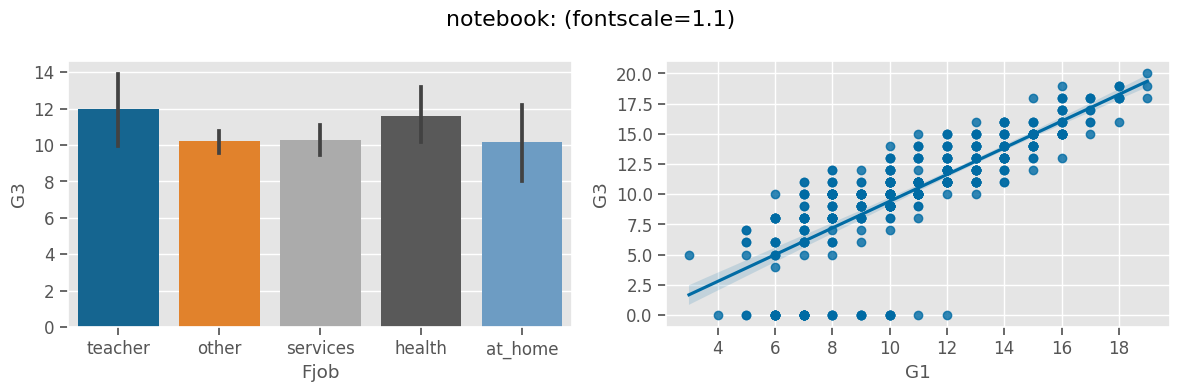

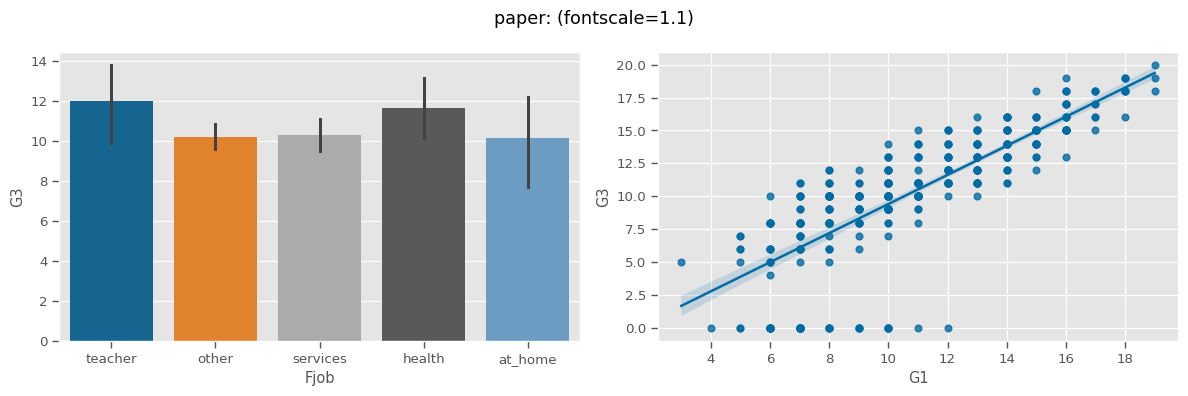

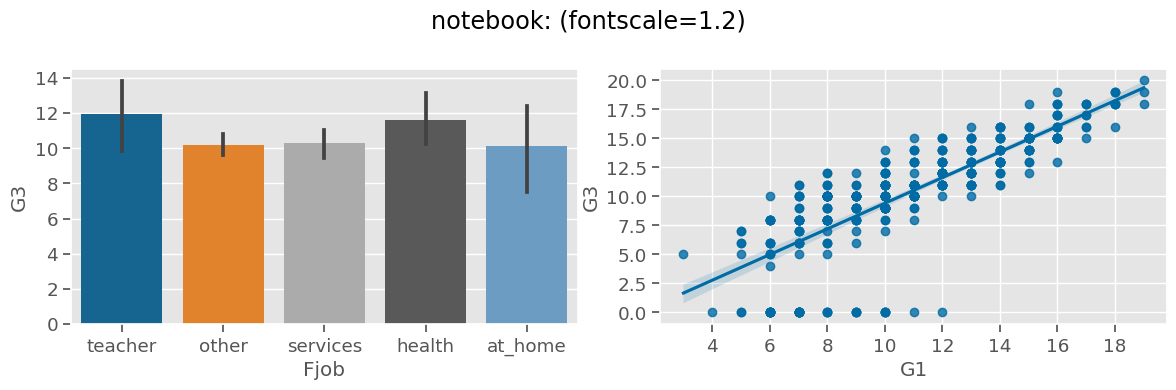

In [12]:
# YOUR OPTIONS HERE
## context, fontscale
test_contexts = [('talk',.8), ('notebook',1.1), ('paper',1.1),
                ('notebook',1.2)]

with plt.style.context(fav_style):
    test_plot(title=str(fav_style));
    for (context,font_scale) in test_contexts:

        with sns.plotting_context(context=context,
                                  font_scale=font_scale):
            f,ax= test_plot(title=f"{context}: (fontscale={font_scale})")

### Saving the Final `fav_context`

- Save the final values for your `context` and `font_sale` into a dict called `fav_context`.

```python
# example fav_context
fav_context  ={'context':'notebook', 'font_scale':1.2}
```

In [13]:
fav_context  ={'context':'notebook', 'font_scale':1.2}

### Final Style Choices

In [14]:
## Print fav_style and fav_context to confirm
print(fav_style)
print(fav_context)

('ggplot', 'tableau-colorblind10')
{'context': 'notebook', 'font_scale': 1.2}


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot:xlabel='Fjob', ylabel='G3'>,
        <AxesSubplot:xlabel='G1', ylabel='G3'>], dtype=object))

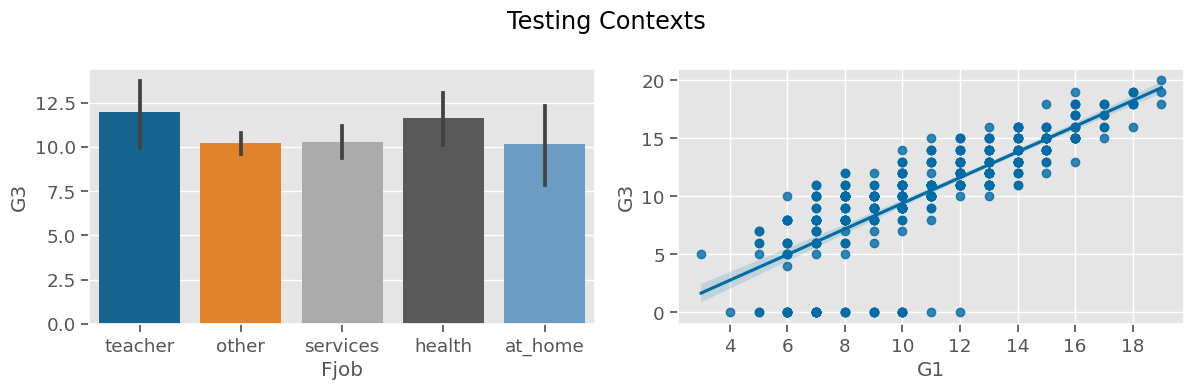

In [15]:
## SET THE STYLE AND SET THE CONTEXT
plt.style.use(fav_style)
sns.set_context(**fav_context)

## Generate Final Test Plot
test_plot()

# BOOKMARK: HERE TO END NEEDS UPDATING

## APPENDIX

### Testing fig.savefig Image Settings

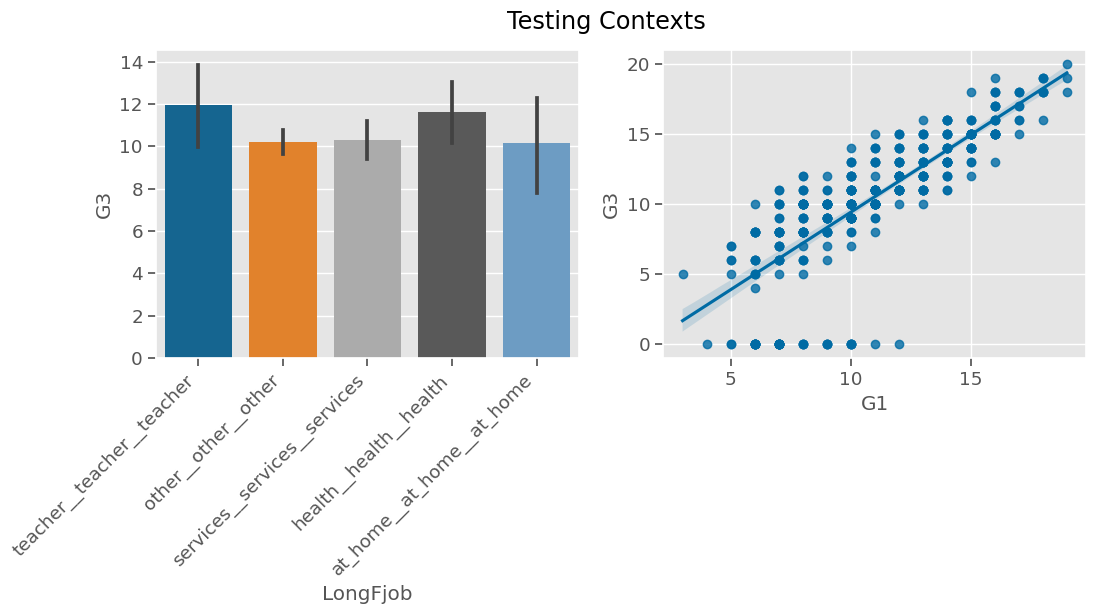

In [16]:
fig, ax = test_plot(x1='LongFjob',rotate=True)

In [17]:
fig.savefig('images/test_plot_trans.png')#,transparent=True)

- Testing Image: Transparent=True


<div style='background-color:black'> <img src="images/test_plot_trans.png">Testing</div>


In [18]:
fig.savefig('images/test_plot_not_t.png',transparent=False)

- Testing Image: Transparent=False
<div style='background-color:black'> <img src="images/test_plot_not_t.png">Testing</div>


### Using Savefig rcParams

In [19]:
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [20]:
##final test
fig.savefig('images/test_plot_final.png')

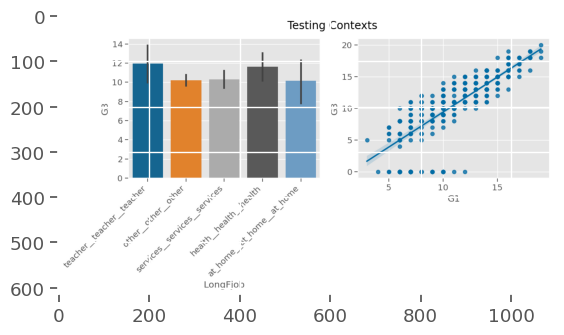

In [21]:
plt.imshow(plt.imread('images/test_plot_final.png'))

- Testing Final Image using rcParams
<div style='background-color:black'> <img src="test_plot_final.png">Testing</div>


## Export Final Choices

- Save the final choices as final use commands in the lp_styles.py file.

In [22]:
final_favs = """import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'"""

In [23]:

with open('my_style.py', 'w+') as f:
    f.write(final_favs)
    
with open('my_style.py', 'r') as f:
    print(f.read())

    


import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'


## RESTART KERNEL AND RUN ONLY CELLS BELOW TO TEST

In [24]:
from my_style import *

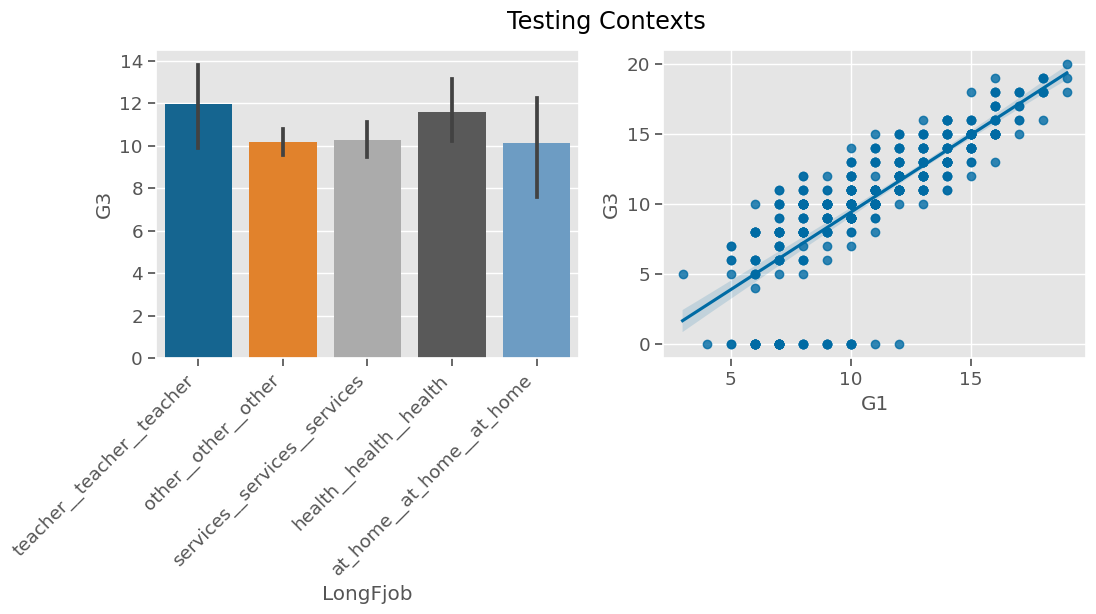

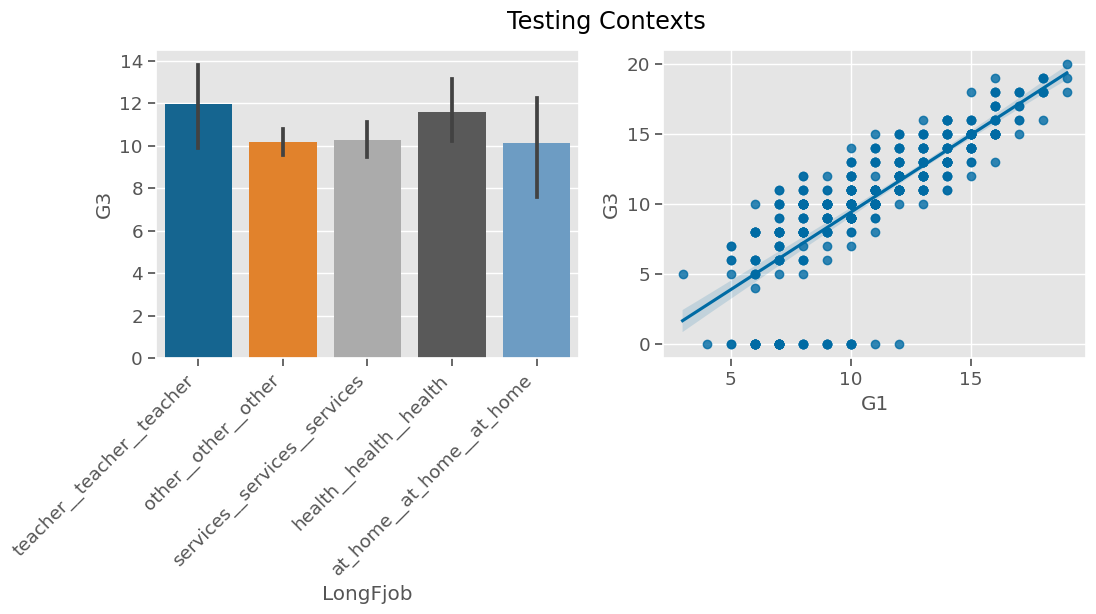

In [25]:
## TESTING VIZ PARAMS [temp]
import pandas as pd
## Load in the student performance - math dataset & display the head and info
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS6xDKNpWkBBdhZSqepy48bXo55QnRv1Xy6tXTKYzZLMPjZozMfYhHQjAcC8uj9hQ/pub?output=xlsx"

df = pd.read_excel(url,sheet_name='student-mat')
## testing longer names
df['LongFjob'] = df['Fjob'] +'__' + df['Fjob'] + '__' + df['Fjob']


def test_plot(title='Testing Contexts',x1='Fjob',rotate=False):
    fig,axes = plt.subplots(ncols=2,figsize=(12,4))
    sns.barplot(data=df,x=x1,y='G3',ax=axes[0])
    sns.regplot(data=df,x='G1',y='G3',ax=axes[1])
    fig.suptitle(title)
    
    if rotate:
        axes[0].set_xticklabels(axes[0].get_xticklabels(),
                            rotation=45, ha='right')
    else:
        fig.tight_layout()   
    return fig, axes
    

fig, axes = test_plot(x1='LongFjob',rotate=True)
fig

In [26]:
fig.savefig('test_plot_t.png')#,transparent=True)

- Testing Image: Transparent=True
<div style='background-color:black'> <img src="test_plot_t.png">Testing</div>


In [27]:
fig.savefig('test_plot_not_t.png',transparent=False)

- Testing Image: Transparent=False
<div style='background-color:black'> <img src="test_plot_not_t.png">Testing</div>


In [28]:
fig.savefig('images/test_plot_final.png')

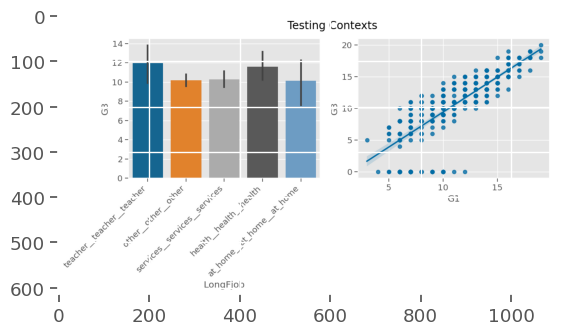

In [29]:
plt.imshow(plt.imread('images/test_plot_final.png'))